# Data mining for HeartBit dataset
---
### Steps
1. Exploratory Data Analysis
    1.1. Understanding the problem
    1.2. Getting to know the data
    1.3. Prepare the data for training
2. Training the model
3. Evaluating the model
4. Improving the model
5. Presenting the solution

## 1. Exploratory Data Analysis
### 1.1. Understanding the problem
The goal of this project is to predict the NYHA class of a patient based on the patient's data. The NYHA (New York Heart Association) class is the functional classification system for the patient with heart failure in stage C or D. The classification is related to the patient symptoms and physical activity.

The NYHA class is divided into four classes:
- Class I: No limitation of physical activity. Ordinary physical activity does not cause undue fatigue, palpitation or shortness of breath.
- Class II: Slight limitation of physical activity. Comfortable at rest. Ordinary physical activity results in fatigue, palpitation or shortness of breath.
- Class III: Marked limitation of physical activity. Comfortable at rest. Less than ordinary activity causes fatigue, palpitation or shortness of breath.
- Class IV: Unable to carry out any physical activity without discomfort. Symptoms of heart failure at rest. If any physical activity is undertaken, discomfort is increased.

### 1.2. Getting to know the data
For this project, I will be using the HeartBit dataset. The dataset contains values of 63 variables recorded for 469 patients.
The variables can be grouped into following groups:
- Clinical
- Technical
- Demographic
- Anthropometry (pomiary antropometryczne - np. wzrost, waga)
- Comorbidities (choroby współistniejące)
- Treatment
- Biochemistry
- Fitness Level

#### The variables

| Additional variable number | Variable name | Variable description                                                                                                          | Character of data | Category of variable |
|---------------------------|---------------|------------------------------------------------------------------------------------------------------------------------------|--------------------|----------------------|
| VAR1                      | DEATH?        | information if the patient is death (1) or alive (0)                                                                         | binary             | Clinical             |
| VAR2                      | DEATHDATE     | date of death (if death=1) or date of the confirmation that the patient is still alive                                       | date               | Technical            |
| VAR3                      | TIMEFU        | number of days between examination and date death or date of the confirmation that the patient is still alive               | number             | Technical            |
| VAR4                      | QOL           | result of the survey measuring the quality of life (QoL, total score range 0–105, from best to worst)                       | number             | Clinical             |
| VAR5                      | OQLsub1       | scores for a QoL subscale - physical dimension (8 items, range 0–40 from best to worst)                                      | number             | Clinical             |
| VAR6                      | OQLsub2       | scores for a QoL subscale - emotional dimension (5 items, range 0–25 from best to worst)                                     | number             | Clinical             |
| VAR7                      | DOB           | date of birth                                                                                                                | date               | Technical            |
| VAR8                      | DOE           | date of the examination                                                                                                      | date               | Technical            |
| VAR9                      | AGE           | age at examination                                                                                                           | number             | Demographic          |
| VAR10                     | HEIGHT.CM     | body height in cm                                                                                                            | number             | Anthropometry        |
| VAR11                     | WEIGHT.KG     | body mass in kg                                                                                                              | number             | Anthropometry        |
| VAR12                     | BMI           | body mass index (mass per squared height); <18.5=underweight range, 18.5 to <25=normal, 25-<30=overweight, 30.0 or higher=obese | number             | Anthropometry        |
| VAR13                     | LVEF.0        | left ventricular ejection fraction - information from the heart ultrasound reflecting the efficiency of pumping                | number             | Clinical             |
| VAR14                     | NYHA          | NYHA Classification - The Stages of Heart Failure                                                                            | category           | Clinical             |
| VAR15                     | PM            | information about artificial pacemaker (0=no pacemaker)                                                                      | binary             | Clinical             |
| VAR16                     | AETH.HF       | information about the clinical cause of heart failure (1=ischemic disease or 2=other)                                         | binary             | Clinical             |
| VAR17                     | MI            | information about previous myocardial infarction (1=yes)                                                                      | binary             | Comorbidities        |
| VAR18                     | AF            | information about atrial fibrillation (1=yes)                                                                                 | binary             | Comorbidities        |
| VAR19                     | DM            | information about diabetes (1=yes)                                                                                            | binary             | Comorbidities        |
| VAR20                     | HT            | information about hypertension (1=yes)                                                                                        | binary             | Comorbidities        |
| VAR21                     | COPD          | information about lung disease (1=yes)                                                                                        | binary             | Comorbidities        |
| VAR22                     | STROKE        | information about previous stroke (1=yes)                                                                                     | binary             | Comorbidities        |
| VAR23                     | KIDNEY.DIS    | information about kidney disease (1=yes)                                                                                      | binary             | Comorbidities        |
| VAR24                     | ACEI.ARB      | information about treatment using ace-inhibitors or ARB (similar drugs, 1=yes)                                                | binary             | Treatment            |
| VAR25                     | BB            | information about treatment using beta blockers (1=yes)                                                                       | binary             | Treatment            |
| VAR26                     | MRA           | information about treatment using aldosterone antagonists (1=yes)                                                             | binary             | Treatment            |
| VAR27                     | DIUR          | information about treatment using oral diuretics (1=yes)                                                                      | binary             | Treatment            |
| VAR28                     | ANTIPLAT      | information about treatment using antiplatelet drugs (1=yes)                                                                  | binary             | Treatment            |
| VAR29                     | STATIN        | information about treatment using statin (1=yes)                                                                              | binary             | Treatment            |
| VAR30                     | DIGOX         | information about treatment using digoxin (1=yes)                                                                             | binary             | Treatment            |
| VAR31                     | HB            | level of blood hemoglobin                                                                                                    | number             | Biochemistry          |
| VAR32                     | NA            | level of blood sodium                                                                                                        | number             | Biochemistry          |
| VAR33                     | K             | level of blood potassium                                                                                                     | number             | Biochemistry          |
| VAR34                     | BNP           | level of blood peptide: BNP (elevated level is characteristic for heart failure)                                              | number             | Biochemistry          |
| VAR35                     | CRP           | level of blood protein CRP (characteristic for inflammation)                                                                  | number             | Biochemistry          |
| VAR36                     | LVEDD         | parameter from heart ultrasound: left ventricular end diastolic diameter (increased in heart failure)                         | number             | Clinical             |
| VAR37                     | MR            | Mitral regurgitation (valvular heart disease), bigger number = worse                                                         | categories         | Clinical             |
| VAR38                     | REST.SBP      | systolic blood pressure at rest                                                                                              | number             | Clinical             |
| VAR39                     | REST.DBP      | diastolic blood pressure at rest                                                                                             | number             | Clinical             |
| VAR40                     | REST.HR       | heart rate at rest                                                                                                           | number             | Clinical             |
| VAR41                     | EXERCISE1     | EXERCISE 1: number of seconds needed to complete the task, higher number = worse)                                             | number             | Fitness level        |
| VAR42                     | EXERCISE2     | EXERCISE 2: number of repeated movements during the task (higher number = better result)                                      | number             | Fitness level        |
| VAR43                     | EXERCISE3     | EXERCISE 3: number of repeated movements during the task (higher number = better result)                                      | number             | Fitness level        |
| VAR44                     | 6MWT.DIST     | number of meters (distance) covered by the patient during the 6 minute walking test (bigger number = better)                  | number             | Fitness level        |
| VAR45                     | 6MWT.FATIGUE  | the level of fatigue assessed by the patient after the walking test (using a scale 0-10)                                      | number OR categories | Fitness level        |
| VAR46                     | 6MWT.DYSPN    | the level of shortness of breath during walking test assessed by the patient (using a scale 0-10)                             | number OR categories | Fitness level        |
| VAR47                     | 6MWT.SBP1     | systolic blood pressure before the walking test                                                                               | number             | Fitness level        |
| VAR48                     | 6MWT.DBP1     | diastolic blood pressure before the walking test                                                                              | number             | Fitness level        |
| VAR49                     | 6MWT.HR1      | heart rate before the walking test                                                                                            | number             | Fitness level        |
| VAR50                     | 6MWT.SBP2     | systolic blood pressure after the walking test                                                                                | number             | Fitness level        |
| VAR51                     | 6MWT.DBP2     | diastolic blood pressure after the walking test                                                                               | number             | Fitness level        |
| VAR52                     | 6MWT.HR2      | heart rate after the walking test                                                                                             | number             | Fitness level        |
| VAR53                     | EXERCISE4     | EXERCISE4: the patient is asked to touch his/her feet with the fingers of the palms. The number represents centimeters          | number             | Fitness level        |
| VAR54                     | EXERCISE5     | EXERCISE5: the patient is asked to touch left palm with the right one but it has to be done at his back. The number represents centimeters | number             | Fitness level        |
| VAR55                     | CPX.TIME      | time of exercise on a treadmill                                                                                              | number             | Fitness level        |
| VAR56                     | CPX.PEAKVO2   | peak oxygen consumption during exercise testing on a treadmill                                                               | number             | Fitness level        |
| VAR57                     | CPX.PEAKVO2FORBM | peak oxygen consumption during exercise testing on a treadmill per body mass                                                | number             | Fitness level        |
| VAR58                     | RER           | respiratory exchange ratio (index of metabolism during an exercise on a treadmill)                                          | number             | Fitness level        |
| VAR59                     | SLOPE         | slope between oxygen and carbon dioxide during exercise testing on a treadmill                                               | number             | Fitness level        |
| VAR60                     | METS          | number of metabolic equivalents (level of work performed by the patient during exercise using a treadmill)                    | number             | Fitness level        |
| VAR61                     | WEBER         | The Weber classification: stratification of patients based on peak VO2 and anaerobic threshold to define functional physical capacity. Higher class is worse | categories         | Fitness level        |
| VAR62                     | PEAK>18       | Dividing patients based on a cutoff value of peak oxygen consumption (used for Weber)                                         | binary             | Fitness level        |
| VAR63                     | SLOPE>35      | Dividing patients based on a cutoff value of slope (used for Weber)                                                          | binary             | Fitness level        |

---
NOTES:
- Sprawdzić dominujące wartości w kolumnach
- Zapoznanie się z działaniem drzewa decyzyjnego z wykorzystaniem biblioteki scikit-learn (https://scikit-learn.org/stable/modules/tree.html)
- Zamiana atrybutów nominalnych na numeryczne (https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)
- Redukcja wielowymiarowości (https://scikit-learn.org/stable/modules/decomposition.html#decompositions)
- Wyważanie klas ze względu na niezbalansowane dane, aby zapobiec tendencyjności modelu w kierunku klasy dominującej - ustawienie class_weight='balanced' (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- przycinanie drzewa decyzyjnego
- scikit-learn wykorzystuje zoptymalizowaną wersję algorytmu CART (Classification and Regression Trees) i nie obsługuje obecnie zmiennych kategorycznych

# 1.3. Prepare data for analysis

In [2]:
import matplotlib.pyplot as plt
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier


In [3]:
# Load data variables names and additional variable numbers
data_headers = pd.read_excel("data/heartbit.xlsx", nrows=1)
# Drop unnecessary CODES column
data_headers = data_headers.drop(columns=['CODES'])
data_headers.head()
data_headers["VAR32"][0] = "NA"

C:\Users\Krystian\AppData\Local\Temp\ipykernel_27384\3816237344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_headers["VAR32"][0] = "NA"


In [4]:
# Load data
data = pd.read_excel("data/heartbit.xlsx", header=1)

# Remove unnecessary CODES column
data = data.drop(columns=['ID CODES '])

# First normalize NYHA target values to 0-4 range. Replace 1.5, 2.5, 3.5 with 1, 2, 4 respectively and remove examples with NYHA missing values
data['NYHA'] = data['NYHA'].replace([1.5, 2.5, 3.5], [1, 2, 4])
print(f"NYHA missing values: {data['NYHA'].isnull().sum()}")
data = data.dropna(subset=['NYHA'])
size_of_data = data.shape
print(f"Data size: {size_of_data}")
NYHA = data['NYHA']

data.head()

NYHA missing values: 9
Data size: (460, 63)


,DEATH?,DEATHDATE,TIMEFU,QOL,OQLsub1,OQLsub2,DOB,DOE,AGE,HEIGHT.CM,...,EXERCISE5,CPX.TIME,CPX.PEAKVO2,CPX.PEAKVO2FORBM,RER,SLOPE,METS,WEBER,PEAK>18,SLOPE>35
0,0.0,2012-02-03,2076,27.0,23.0,4.0,1959-06-14,2006-05-29,46.989041,170.0,...,-10.0,14.523,2577.8,23.98,1.04,37.485389,6.851429,1.0,1.0,1.0
1,0.0,2012-08-12,2316,42.0,37.0,5.0,1958-12-22,2006-04-10,47.331507,165.0,...,-13.0,17.267,1555.8,22.22,1.00,37.232158,6.348571,1.0,1.0,1.0
2,0.0,2012-02-21,2349,0.0,0.0,0.0,1945-11-25,2005-09-16,59.849315,177.0,...,-22.0,15.195,1748.6,21.86,1.17,44.719476,6.245714,1.0,1.0,1.0
3,0.0,2013-02-03,2459,10.0,7.0,3.0,1945-03-20,2006-05-12,61.186301,173.0,...,-38.0,13.450,1799.8,20.58,1.16,39.423029,5.880000,1.0,1.0,1.0
4,0.0,2013-02-03,2629,4.0,2.0,2.0,1982-03-07,2005-11-23,23.731507,180.0,...,4.0,16.380,2626.4,26.54,1.21,21.051193,7.582857,1.0,1.0,0.0


In [5]:
# Check missing values
data.isnull().sum()
# Print all columns with missing values in descending order
data.isnull().sum().sort_values(ascending=False)

OQLsub1        232
OQLsub2        232
CPX.PEAKVO2    213
QOL            209
METS           199
              ... 
NYHA             0
WEIGHT.KG        0
HEIGHT.CM        0
BMI              0
DOE              0
Length: 63, dtype: int64

In [6]:
groups = {
    'clinical': ['VAR1', 'VAR4', 'VAR5', 'VAR6', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR36', 'VAR37', 'VAR38', 'VAR39',
                 'VAR40'],
    'technical': ['VAR2', 'VAR3', 'VAR7', 'VAR8'],
    'demographic': ['VAR9'],
    'anthropometry': ['VAR10', 'VAR11', 'VAR12'],
    'comorbidities': ['VAR17', 'VAR18', 'VAR19', 'VAR20', 'VAR21', 'VAR22', 'VAR23'],
    'treatment': ['VAR24', 'VAR25', 'VAR26', 'VAR27', 'VAR28', 'VAR29', 'VAR30'],
    'biochemistry': ['VAR31', 'VAR32', 'VAR33', 'VAR34', 'VAR35'],
    'fitness_level': ['VAR41', 'VAR42', 'VAR43', 'VAR44', 'VAR45', 'VAR46', 'VAR47', 'VAR48', 'VAR49', 'VAR50', 'VAR51',
                      'VAR52', 'VAR53', 'VAR54', 'VAR55', 'VAR56', 'VAR57', 'VAR58', 'VAR59', 'VAR60', 'VAR61', 'VAR62',
                      'VAR63']
}

# Replace variable numbers with variable names in groups
for group_name, list_of_variables in groups.items():
    for variable in list_of_variables:
        if variable == "VAR32":
            print(data_headers[variable][0])
        groups[group_name][list_of_variables.index(variable)] = data_headers[variable][0]

NA


Clinical group columns: Index(['DEATH?', 'QOL', 'OQLsub1', 'OQLsub2', 'LVEF.0', 'NYHA', 'PM',
       'AETH.HF', 'LVEDD', 'MR', 'REST.SBP', 'REST.DBP', 'REST.HR'],
      dtype='object')


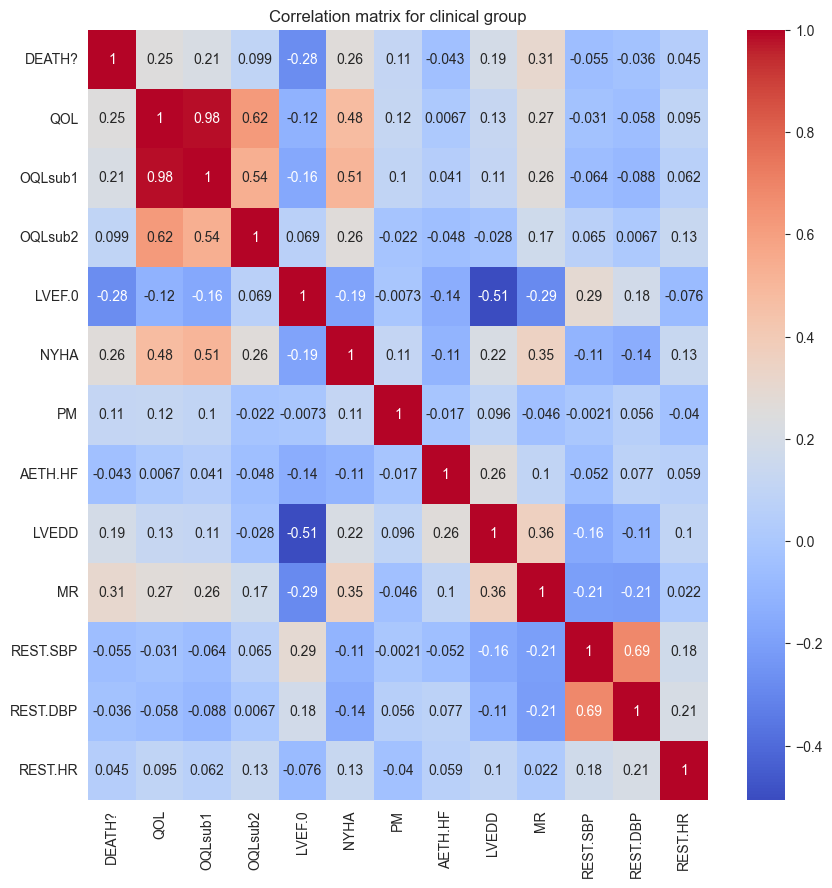

          correlation  missing_values  importance
LVEF.0       0.186068               4    0.205707
QOL          0.478678             209    0.176660
OQLsub1      0.509331             232    0.116752
REST.HR      0.130783             107    0.098371
LVEDD        0.217134             158    0.097853
AETH.HF      0.109794               4    0.072766
REST.SBP     0.110033             105    0.062786
REST.DBP     0.137873             105    0.046116
DEATH?       0.259704              80    0.045414
OQLsub2      0.259752             232    0.038212
MR           0.348017             164    0.034793
PM           0.114863              69    0.004569


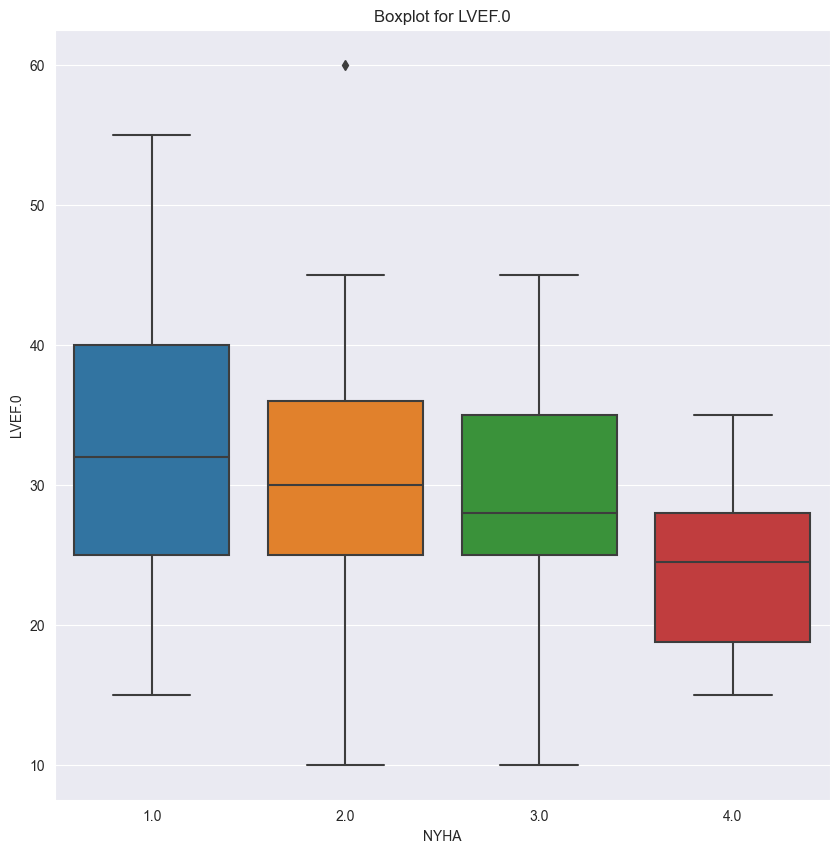

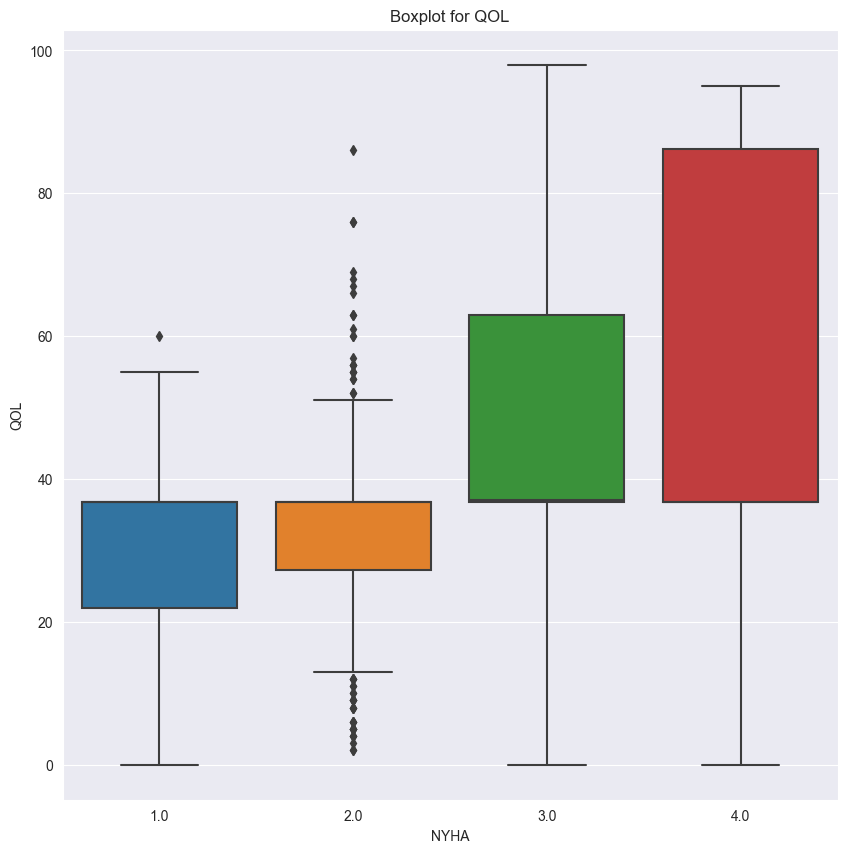

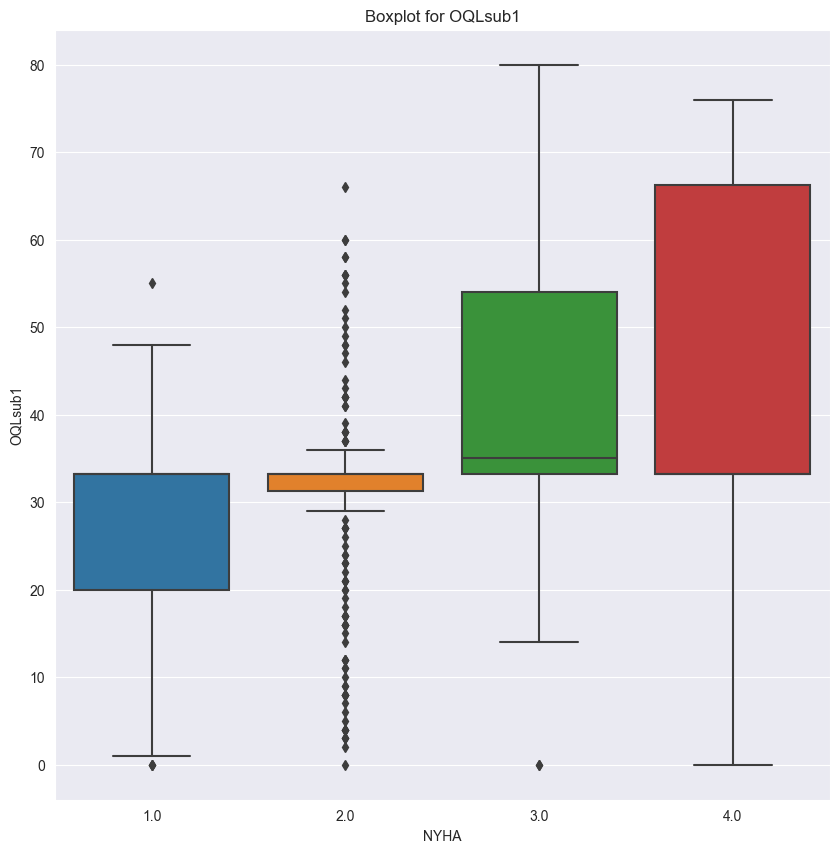

In [7]:
# Create clinical group
clinical_group = data[groups['clinical']].copy()
print(f"Clinical group columns: {clinical_group.columns}")
# Plot correlation chart
plt.figure(figsize=(10, 10))
sns.heatmap(clinical_group.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix for clinical group')
plt.show()

# Print together corelation values for NYHA target variable with number of missing values and importance of variable
group_checking = {}
for column in clinical_group.columns:
    if column == 'NYHA':
        continue

    group_checking[column] = [abs(clinical_group[column].corr(NYHA)),
                              clinical_group[column].isnull().sum()]

# Replace all missing values with mean
clinical_group = clinical_group.fillna(clinical_group.mean())
X = clinical_group.drop(columns=['NYHA'])
y = clinical_group['NYHA']
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X, y)
feature_importances = model.feature_importances_

for column in clinical_group.columns:
    if column == 'NYHA':
        continue

    group_checking[column].append(feature_importances[X.columns.get_loc(column)])

group_checking = pd.DataFrame.from_dict(group_checking, orient='index',
                                        columns=['correlation', 'missing_values', 'importance'])
group_checking = group_checking.sort_values(by='importance', ascending=False)
print(group_checking)

# Print boxplots for variables 'LVEF.0','QOL', 'OQLsub1'
boxplots = ['LVEF.0', 'QOL', 'OQLsub1']
for column in boxplots:
    plt.figure(figsize=(10, 10))
    sns.boxplot(x='NYHA', y=column, data=clinical_group)
    plt.title(f'Boxplot for {column}')
    plt.show()

# Conclusion from clinical group:
From the above table we can see that the most important variables are:
- QOL - result of quality of life questionnaire
- OQLsub1 - left ventricular ejection fraction - information from the heart ultrasound reflecting the efficiency of pumping. According to the definition value = 45 or lower is characteristic for systolic heart failure.
- LVEF.0 - left ventricular ejection fraction

From this group we choose QOL and LVEF.0 variables as discriminative variables. And replace missing values with mean value.

Index(['DEATHDATE', 'TIMEFU', 'DOB', 'DOE'], dtype='object')


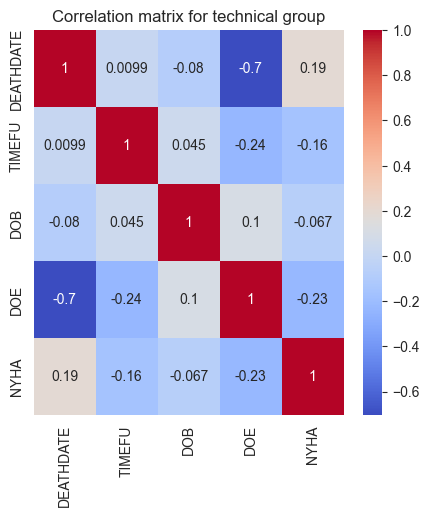

           correlation  missing_values
DOE           0.227184               0
DEATHDATE     0.190624              81
TIMEFU        0.158056               0
DOB           0.067054               7


In [8]:
# Create technical group
technical_group = data[groups['technical']].copy()

# Print columns
print(technical_group.columns)

# Add NYHA target variable
technical_group['NYHA'] = NYHA

# Check TIMEFU column
# Replace with all elements with type 'str' with mean value
technical_group["TIMEFU"] = technical_group["TIMEFU"].apply(lambda x: np.nan if type(x) == str else x)
technical_group["TIMEFU"] = technical_group["TIMEFU"].fillna(technical_group["TIMEFU"].mean())

corr_matrix = technical_group.corr()

# Plot correlation chart
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix for technical group')
plt.show()

# Print together corelation values for NYHA target variable with number of missing values
checking_data = {}
for column in technical_group.columns:
    if column == 'NYHA':
        continue

    checking_data[column] = [abs(corr_matrix[column]['NYHA']), technical_group[column].isnull().sum()]

checking_data = pd.DataFrame.from_dict(checking_data, orient='index',
                                       columns=['correlation', 'missing_values'])
checking_data = checking_data.sort_values(by='correlation', ascending=False)
print(checking_data)

# Conclusion from technical group:
From the above table we don't see any variable with high correlation with NYHA target variable. So we will not use any variable from this group.

AGE     float64
NYHA    float64
dtype: object


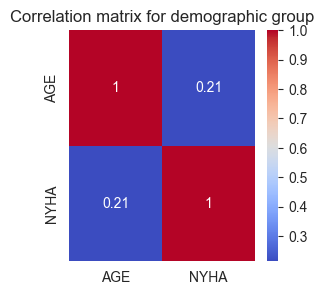

,AGE,NYHA
0,47.0,2.0
1,47.0,2.0
2,60.0,1.0
3,61.0,1.0
4,24.0,1.0
...,...,...
464,61.0,2.0
465,72.0,2.0
466,72.0,3.0
467,75.0,3.0


<Figure size 300x300 with 0 Axes>

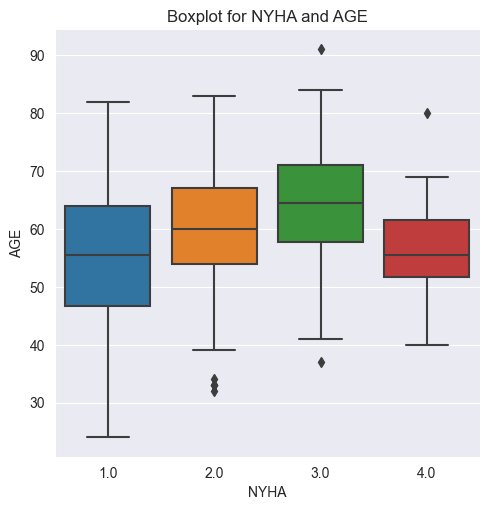

In [9]:
# Create demographic group
demographic_group = data[groups['demographic']].copy()

# Round age to integer
demographic_group['AGE'] = demographic_group['AGE'].round()

# Add NYHA target variable
demographic_group['NYHA'] = NYHA

# Check columns types
print(demographic_group.dtypes)

# Print correlation chart
plt.figure(figsize=(3, 3))
sns.heatmap(demographic_group.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix for demographic group')
plt.show()

# Print boxplot for NYHA and AGE
plt.figure(figsize=(3, 3))
sns.catplot(x='NYHA', y='AGE', data=demographic_group, kind='box')
plt.title('Boxplot for NYHA and AGE')
demographic_group

# Conclusion from demographic group:
We choose AGE variable as discriminative variable. And replace missing values with mean value.

Anthropometry group columns: Index(['HEIGHT.CM', 'WEIGHT.KG', 'BMI'], dtype='object')
HEIGHT.CM    float64
WEIGHT.KG    float64
BMI          float64
NYHA         float64
dtype: object
           correlation  missing_values  importance
BMI           0.026335               0    0.509752
WEIGHT.KG     0.001209               0    0.299917
HEIGHT.CM     0.047999               0    0.190330


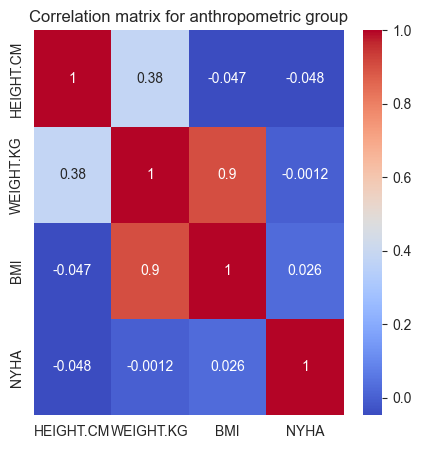

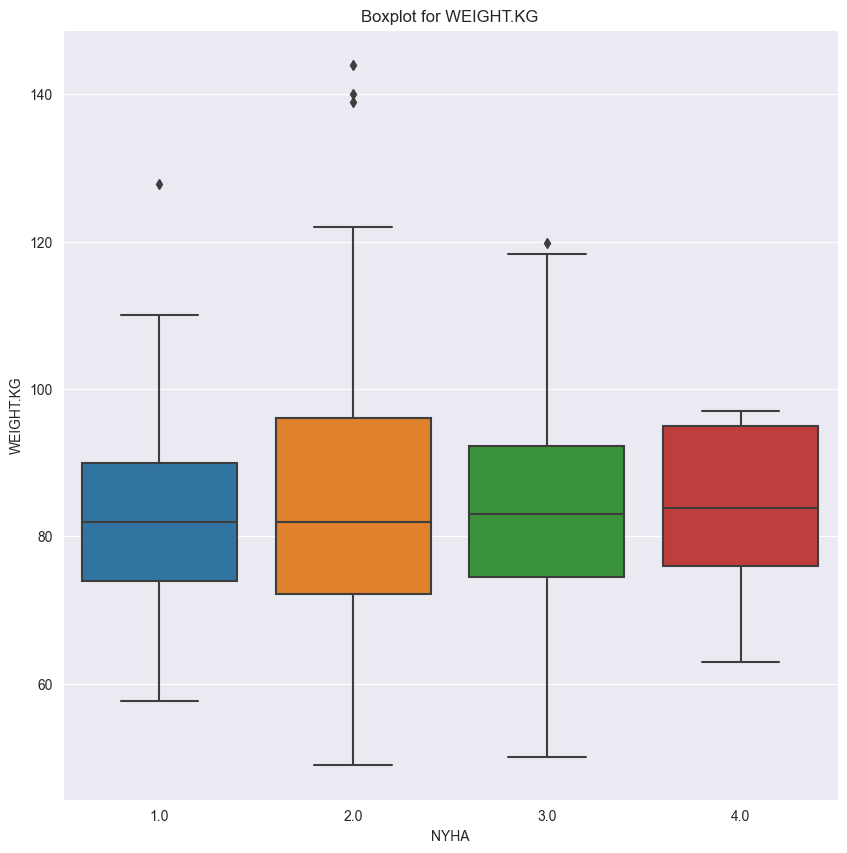

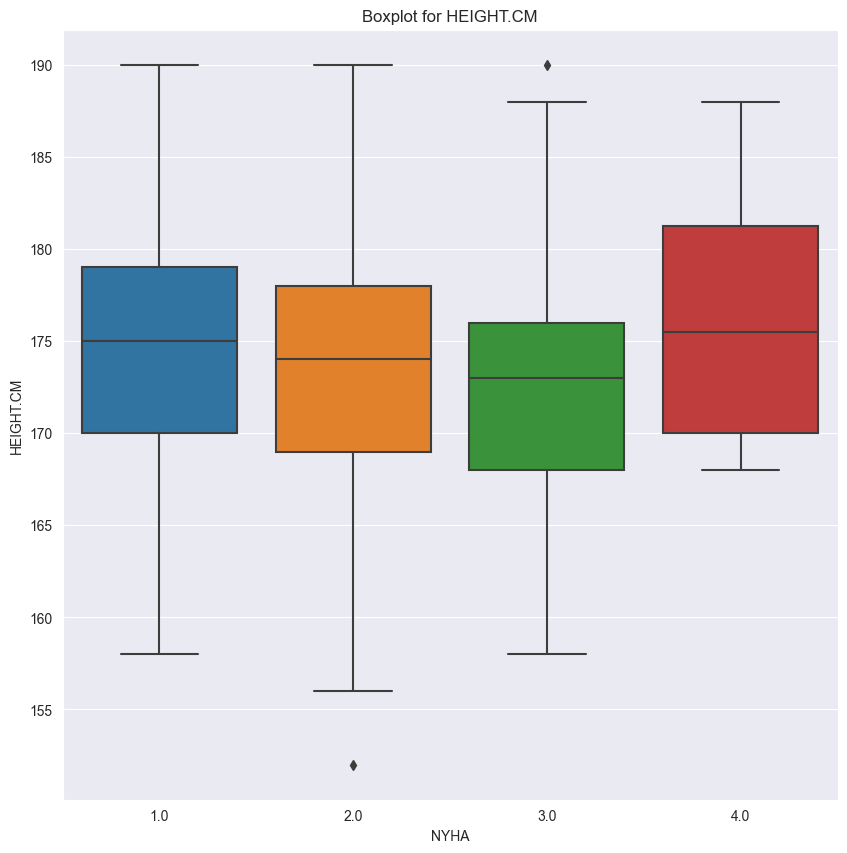

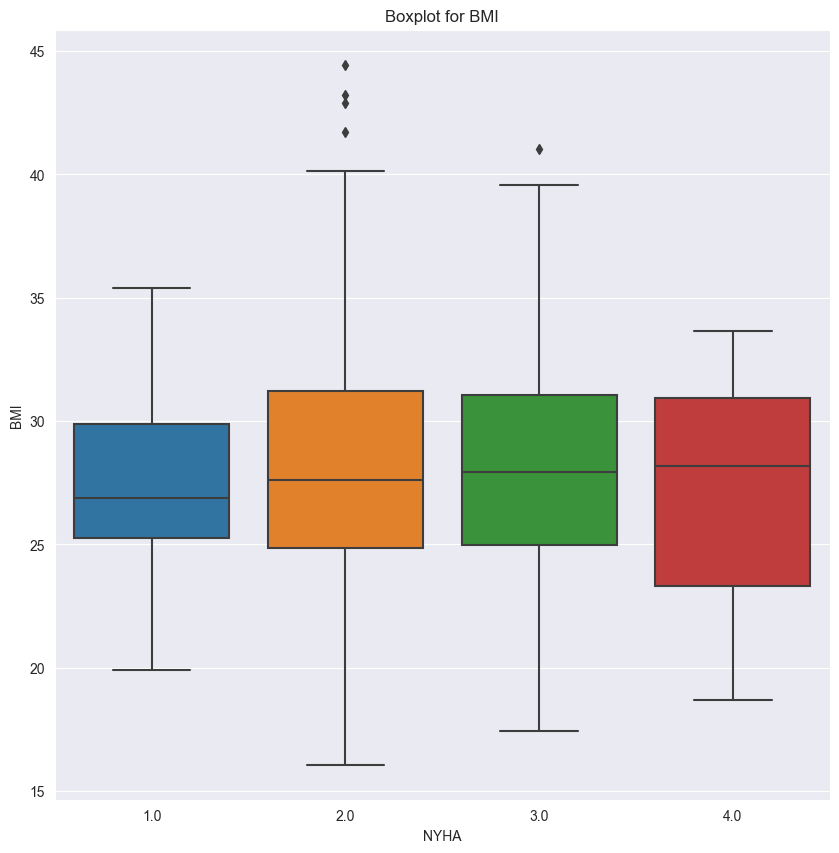

In [10]:
# Create anthropometric group
anthropometric_group = data[groups['anthropometry']].copy()
print(f"Anthropometry group columns: {anthropometric_group.columns}")

# Add NYHA target variable
anthropometric_group['NYHA'] = NYHA

# Check columns types
print(anthropometric_group.dtypes)
# Print correlation chart
correlation_matrix = anthropometric_group.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix for anthropometric group')

# Print together corelation values for NYHA target variable with number of missing values
checking_data = {}
for column in anthropometric_group.columns:
    if column == 'NYHA':
        continue

    checking_data[column] = [abs(correlation_matrix[column]['NYHA']),
                             anthropometric_group[column].isnull().sum()]

X = anthropometric_group.drop(columns=['NYHA'])
y = anthropometric_group['NYHA']
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X, y)
feature_importances = model.feature_importances_

# Add importance to checking_data
for column in anthropometric_group.columns:
    if column == 'NYHA':
        continue

    checking_data[column].append(feature_importances[X.columns.get_loc(column)])

checking_data = pd.DataFrame.from_dict(checking_data, orient='index',
                                       columns=['correlation', 'missing_values', 'importance'])
checking_data = checking_data.sort_values(by='importance', ascending=False)
print(checking_data)

# Print boxplots for variables 'WEIGHT', 'HEIGHT', 'BMI'
boxplots = ['WEIGHT.KG', 'HEIGHT.CM', 'BMI']
for column in boxplots:
    plt.figure(figsize=(10, 10))
    sns.boxplot(x='NYHA', y=column, data=anthropometric_group)
    plt.title(f'Boxplot for {column}')
    plt.show()

# Conclusion from anthropometric group:
From the above table we can see that the most important variables are:
- BMI - body mass index
- WEIGHT.KG - weight in kilograms

From this group we choose BMI variables as discriminative variables. There are no missing values in this group.

Comorbidities group columns: Index(['MI', 'AF', 'DM', 'HT', 'COPD', 'STROKE', 'KIDNEY.DIS'], dtype='object')
MI            float64
AF            float64
DM            float64
HT            float64
COPD          float64
STROKE        float64
KIDNEY.DIS    float64
dtype: object
MI values: [ 1.  0. nan]
AF values: [ 0.  1. nan]
DM values: [ 1.  0. nan]
HT values: [ 1.  0. nan]
COPD values: [ 0.  1. nan]
STROKE values: [ 0.  1. nan]
KIDNEY.DIS values: [ 0.  1. nan]


,correlation,missing_values,importance
AF,0.199926,4,0.254487
KIDNEY.DIS,0.218580,89,0.191397
MI,0.073053,25,0.159998
HT,0.026935,106,0.132703
STROKE,0.059388,47,0.125808
DM,0.214163,27,0.093056
COPD,0.130042,49,0.042549


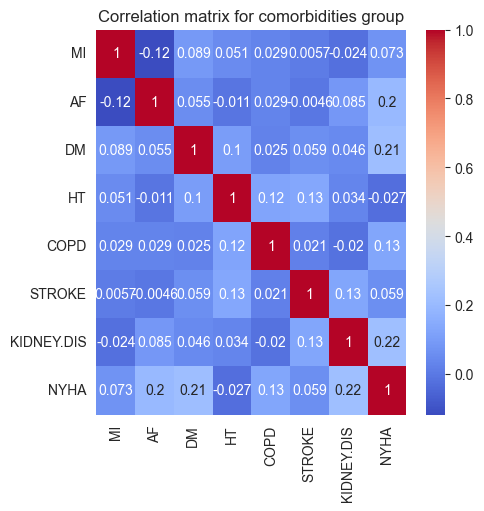

In [11]:
# Create comorbidities group
comorbidities_group = data[groups['comorbidities']].copy()
print(f"Comorbidities group columns: {comorbidities_group.columns}")

# Check columns types
print(comorbidities_group.dtypes)

# Add NYHA target variable
comorbidities_group['NYHA'] = NYHA

# Print correlation chart
correlation_matrix = comorbidities_group.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix for comorbidities group')

checking_data = {}
for column in comorbidities_group.columns:
    if column == 'NYHA':
        continue

    checking_data[column] = [abs(correlation_matrix[column]['NYHA']),
                             comorbidities_group[column].isnull().sum()]

# Check if there are only 0 and 1 values
for column in comorbidities_group.columns:
    if column == 'NYHA':
        continue

    print(f"{column} values: {comorbidities_group[column].unique()}")

# Find important variables and replace all missing values with 0 (no comorbidity)
comorbidities_group = comorbidities_group.fillna(0)
X = comorbidities_group.drop(columns=['NYHA'])
y = comorbidities_group['NYHA']
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X, y)
feature_importances = model.feature_importances_

# Add importance to checking_data
for column in comorbidities_group.columns:
    if column == 'NYHA':
        continue

    checking_data[column].append(feature_importances[X.columns.get_loc(column)])

checking_data = pd.DataFrame.from_dict(checking_data, orient='index',
                                       columns=['correlation', 'missing_values', 'importance'])
checking_data = checking_data.sort_values(by='importance', ascending=False)
checking_data

# Conclusion from comorbidities group:
From the above table we can see that the most important variables are:
- AF - atrial fibrillation (migotanie przedsionków)
- KIDNEY.DIS - kidney disease (choroba nerek)
- MI - myocardial infarction (zawał mięśnia sercowego)

From this group we choose AF, KIDNEY.DIS and MI variables as discriminative variables. The missing values will be replaced with 0 (no comorbidity).

Treatment group columns: Index(['ACEI.ARB', 'BB', 'MRA', 'DIUR', 'ANTIPLAT', 'STATIN', 'DIGOX'], dtype='object')
ACEI.ARB    float64
BB          float64
MRA         float64
DIUR        float64
ANTIPLAT    float64
STATIN      float64
DIGOX       float64
dtype: object
ACEI.ARB values: [ 1.  0. nan]
BB values: [ 1.  0. nan]
MRA values: [ 1.  0. nan]
DIUR values: [ 1.  0. nan]
ANTIPLAT values: [ 1.  0. nan]
STATIN values: [ 1.  0. nan]
DIGOX values: [ 0.  1.  9. nan]
DIGOX values: [ 0.  1. nan]


,correlation,missing_values,importance
DIUR,0.265262,5,0.232015
MRA,0.022006,13,0.226808
DIGOX,0.144215,2,0.164875
ANTIPLAT,0.057469,1,0.114535
STATIN,0.008576,2,0.105365
ACEI.ARB,0.032399,1,0.082271
BB,0.053643,1,0.074130


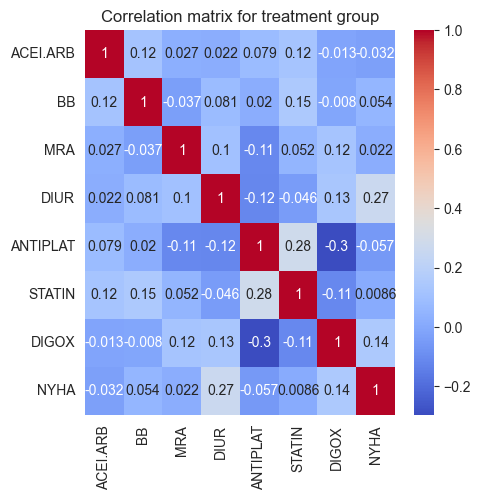

In [12]:
# Create treatment group
treatment_group = data[groups['treatment']].copy()
print(f"Treatment group columns: {treatment_group.columns}")

# Check columns types
print(treatment_group.dtypes)

# Add NYHA target variable
treatment_group['NYHA'] = NYHA

# Correlation matrix
correlation_matrix = treatment_group.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix for treatment group')

checking_data = {}
for column in treatment_group.columns:
    if column == 'NYHA':
        continue

    checking_data[column] = [abs(correlation_matrix[column]['NYHA']),
                             treatment_group[column].isnull().sum()]

# Check if there are only 0 and 1 values
for column in treatment_group.columns:
    if column == 'NYHA':
        continue

    print(f"{column} values: {treatment_group[column].unique()}")

# In DIGOX we have additional value 9.0 - unknown so we replace it with 0
treatment_group['DIGOX'] = treatment_group['DIGOX'].replace(9.0, 0)
print(f"DIGOX values: {treatment_group['DIGOX'].unique()}")

# Find important variables and replace all missing values with 0 (no treatment)
treatment_group = treatment_group.fillna(0)
X = treatment_group.drop(columns=['NYHA'])
y = treatment_group['NYHA']
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X, y)
feature_importances = model.feature_importances_

# Add importance to checking_data
for column in treatment_group.columns:
    if column == 'NYHA':
        continue

    checking_data[column].append(feature_importances[X.columns.get_loc(column)])

checking_data = pd.DataFrame.from_dict(checking_data, orient='index',
                                       columns=['correlation', 'missing_values', 'importance'])
checking_data = checking_data.sort_values(by='importance', ascending=False)
checking_data

# Conclusion from treatment group:
From the above table we can see that the most important variables are:
- DIUR - diuretics (leki moczopędne)
- MRA - mineralocorticoid receptor antagonists (antagoniści receptora mineralokortykoidowego)
- DIGOX - digoxin (leki glikozydowe)

From this group we choose DIUR and DIGOX variables as discriminative variables (No MRA because there is low correlation with NYHA). The missing values will be replaced with 0 (no treatment).

Biochemistry group columns: Index(['HB', 'NA', 'K', 'BNP', 'CRP'], dtype='object')
HB     float64
NA     float64
K      float64
BNP     object
CRP    float64
dtype: object


,correlation,missing_values,importance
BNP,0.323714,46,0.319905
NA,0.093844,16,0.197540
K,0.325927,16,0.193828
HB,0.256574,15,0.171919
CRP,0.326251,150,0.116807


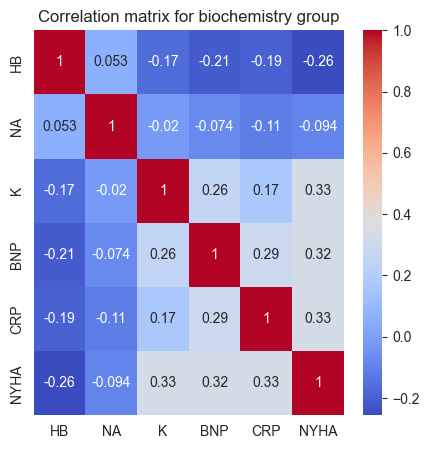

In [13]:
# Create biochemistry group
biochemistry_group = data[groups['biochemistry']].copy()
print(f"Biochemistry group columns: {biochemistry_group.columns}")

# Check columns types
print(biochemistry_group.dtypes)

# Check BNP values
# print(f"BNP values: {biochemistry_group['BNP'].unique()}")

# Find all variables with type string and replace them
is_string = biochemistry_group['BNP'].apply(lambda x: isinstance(x, str))
# Replace all string values with NaN
biochemistry_group['BNP'] = biochemistry_group['BNP'].where(~is_string, np.nan)

# Add NYHA target variable
biochemistry_group['NYHA'] = NYHA

# Correlation matrix
correlation_matrix = biochemistry_group.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix for biochemistry group')

# Check correlation with NYHA
checking_data = {}
for column in biochemistry_group.columns:
    if column == 'NYHA':
        continue

    checking_data[column] = [abs(correlation_matrix[column]['NYHA']),
                             biochemistry_group[column].isnull().sum()]

# Find important variables and replace all missing values with mean
biochemistry_group = biochemistry_group.fillna(biochemistry_group.mean())

X = biochemistry_group.drop(columns=['NYHA'])
y = biochemistry_group['NYHA']
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X, y)
feature_importances = model.feature_importances_

# Add importance to checking_data
for column in biochemistry_group.columns:
    if column == 'NYHA':
        continue

    checking_data[column].append(feature_importances[X.columns.get_loc(column)])

checking_data = pd.DataFrame.from_dict(checking_data, orient='index',
                                       columns=['correlation', 'missing_values', 'importance'])
checking_data = checking_data.sort_values(by='importance', ascending=False)
checking_data

# Print boxplots for all variables
# for column in biochemistry_group.columns:
#     if column == 'NYHA':
#         continue
#
#     plt.figure(figsize=(5,5))
#     sns.boxplot(x='NYHA', y=column, data=biochemistry_group)
#     plt.title(f'Boxplot for {column}')
#     plt.show()

# Conclusion from biochemistry group:
From the above table we can see that the most important variables are:
- BNP - level of blood peptide (poziom peptydu BNP) (podwyższony poziom BNP wskazuje na niewydolność serca)
- NA - level of sodium (poziom sodu)
- K - level of potassium (poziom potasu)
- HB - level of hemoglobin (poziom hemoglobiny)

From this group we choose BNP, NA, K and HB variables as discriminative variables. The missing values will be replaced with mean.

Fitness level group columns: Index(['EXERCISE1', 'EXERCISE2', 'EXERCISE3', '6MWT.DIST', '6MWT.FATIGUE',
       '6MWT.DYSPN', '6MWT.SBP1', '6MWT.DBP1', '6MWT.HR1', '6MWT.SBP2',
       '6MWT.DBP2', '6MWT.HR2', 'EXERCISE4', 'EXERCISE5', 'CPX.TIME',
       'CPX.PEAKVO2', 'CPX.PEAKVO2FORBM', 'RER', 'SLOPE', 'METS', 'WEBER',
       'PEAK>18', 'SLOPE>35'],
      dtype='object')
EXERCISE1           float64
EXERCISE2           float64
EXERCISE3           float64
6MWT.DIST           float64
6MWT.FATIGUE        float64
6MWT.DYSPN          float64
6MWT.SBP1           float64
6MWT.DBP1           float64
6MWT.HR1            float64
6MWT.SBP2           float64
6MWT.DBP2           float64
6MWT.HR2            float64
EXERCISE4           float64
EXERCISE5           float64
CPX.TIME            float64
CPX.PEAKVO2         float64
CPX.PEAKVO2FORBM    float64
RER                 float64
SLOPE               float64
METS                float64
WEBER               float64
PEAK>18             float64
SLOPE>35  

,correlation,missing_values,importance
6MWT.DIST,0.581996,5,2.708205e-01
CPX.PEAKVO2FORBM,0.538832,51,1.343703e-01
CPX.TIME,0.598494,114,7.995750e-02
6MWT.DYSPN,0.397574,103,7.115646e-02
EXERCISE1,0.484936,6,6.109058e-02
EXERCISE3,0.499637,6,5.979373e-02
EXERCISE5,0.152200,72,4.406628e-02
RER,0.048624,82,3.948409e-02
SLOPE,0.363368,52,3.665109e-02
6MWT.HR1,0.105740,49,3.383881e-02


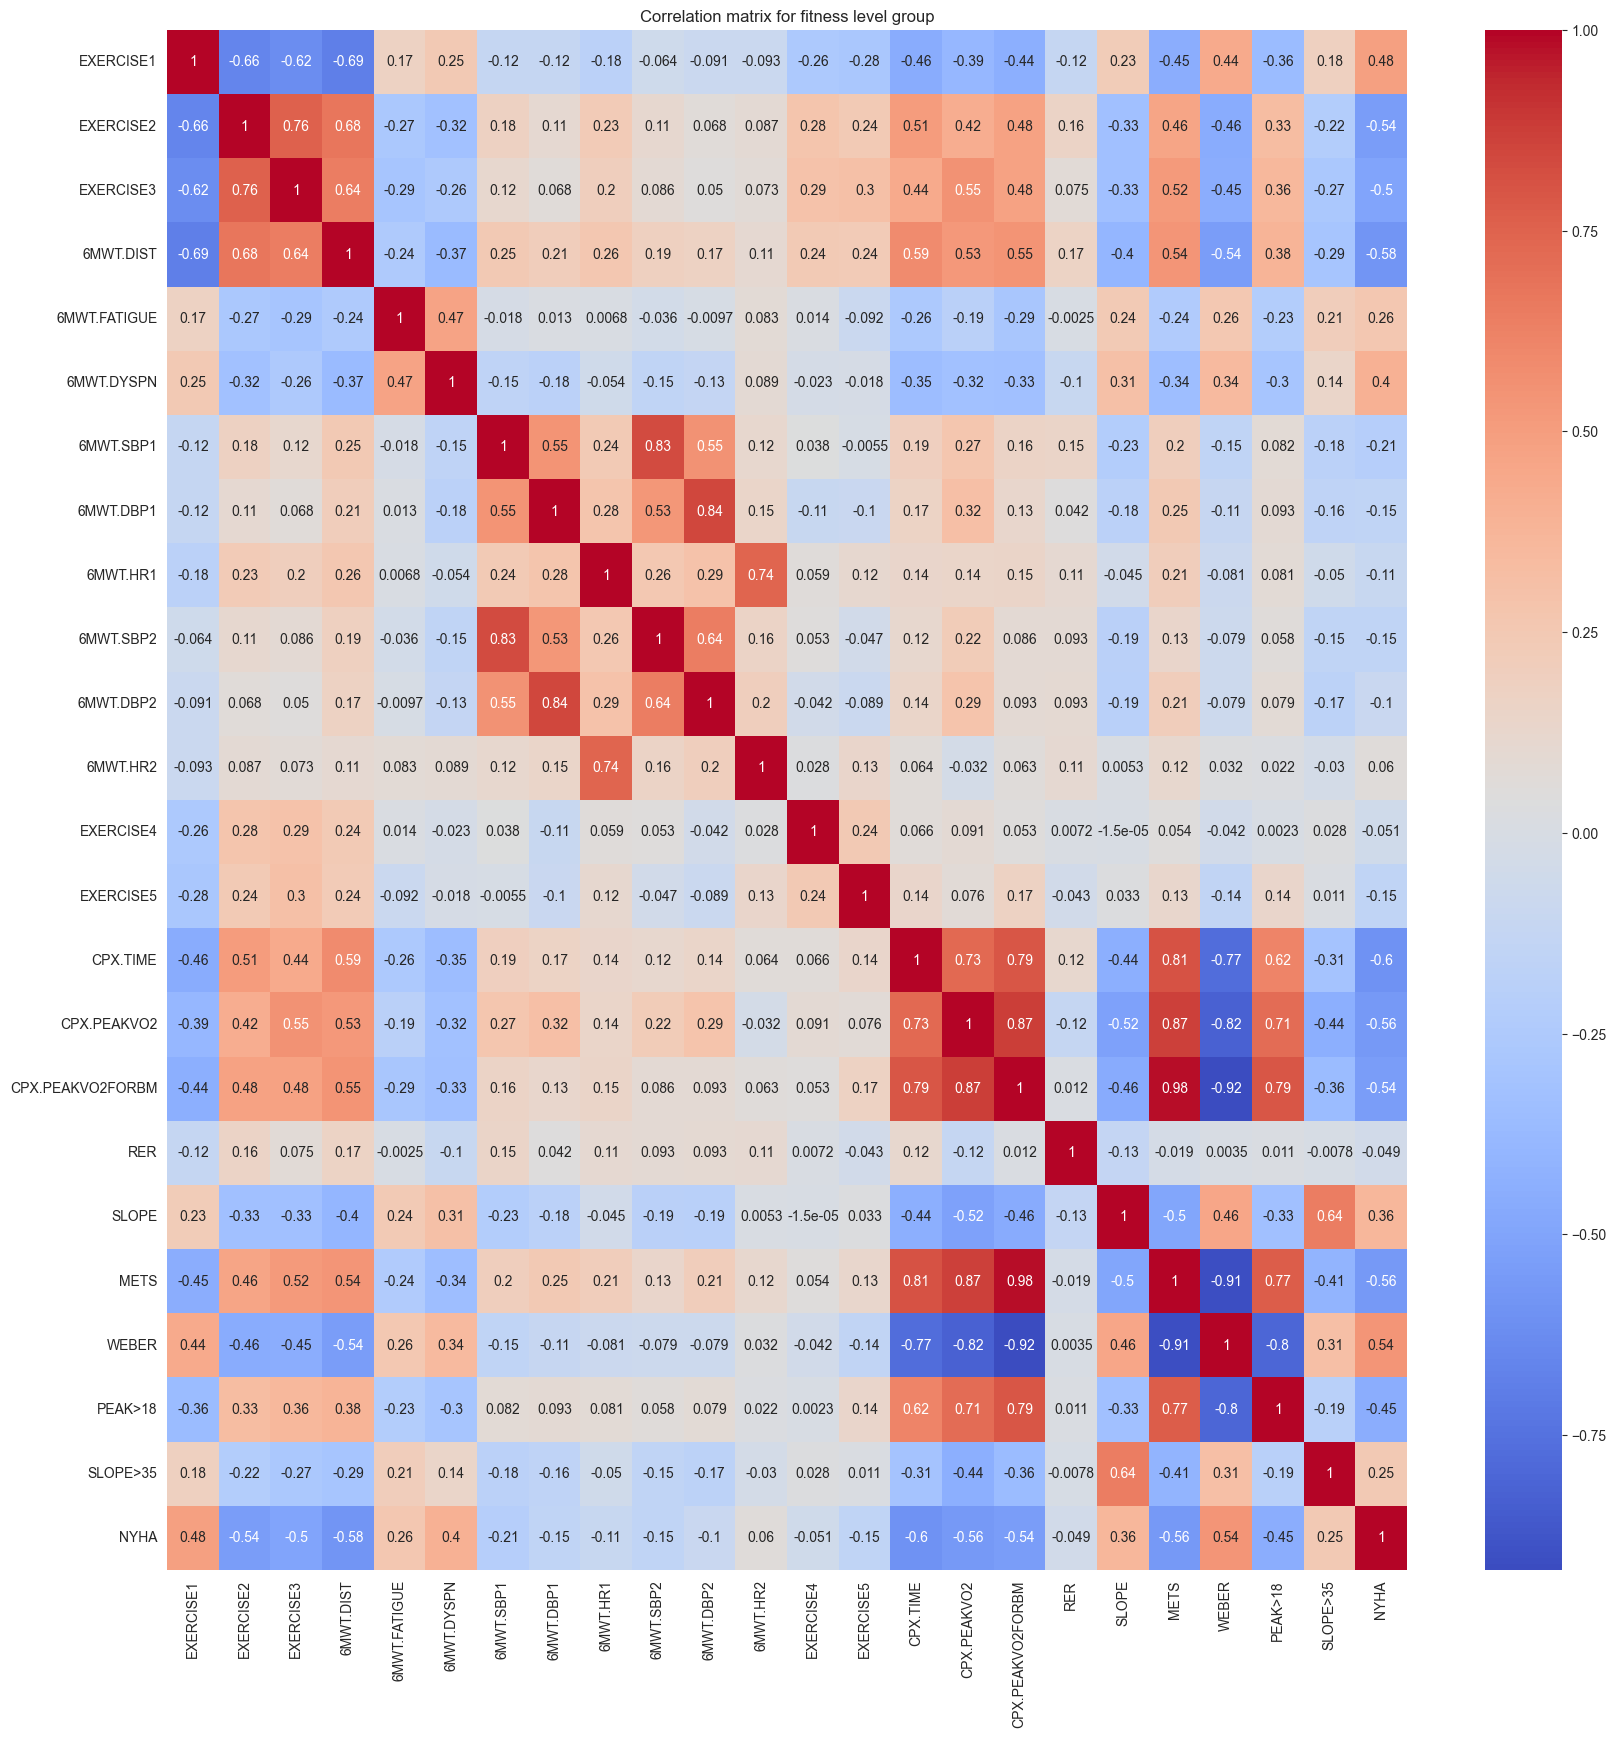

In [14]:
# Create fitness_level group
fitness_level_group = data[groups['fitness_level']].copy()
print(f"Fitness level group columns: {fitness_level_group.columns}")

# Check columns types
print(fitness_level_group.dtypes)

# Add NYHA target variable
fitness_level_group['NYHA'] = NYHA

# Correlation matrix
correlation_matrix = fitness_level_group.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix for fitness level group')

# Check correlation with NYHA
checking_data = {}
for column in fitness_level_group.columns:
    if column == 'NYHA':
        continue

    checking_data[column] = [abs(correlation_matrix[column]['NYHA']),
                             fitness_level_group[column].isnull().sum()]

# Find important variables and replace all missing values with mean
fitness_level_group = fitness_level_group.fillna(fitness_level_group.mean())

X = fitness_level_group.drop(columns=['NYHA'])
y = fitness_level_group['NYHA']
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X, y)
feature_importances = model.feature_importances_

# Add importance to checking_data
for column in fitness_level_group.columns:
    if column == 'NYHA':
        continue

    checking_data[column].append(feature_importances[X.columns.get_loc(column)])

checking_data = pd.DataFrame.from_dict(checking_data, orient='index',
                                       columns=['correlation', 'missing_values', 'importance'])
checking_data = checking_data.sort_values(by='importance', ascending=False)

# Print all variables with high correlation with each other
for column in fitness_level_group.columns:
    if column == 'NYHA':
        continue

    for column2 in fitness_level_group.columns:
        if column2 == 'NYHA' or column == column2:
            continue

        if abs(correlation_matrix[column][column2]) > 0.8:
            print(f"High correlation between {column} and {column2}")

# Print boxplots for all variables
# for column in fitness_level_group.columns:
#     if column == 'NYHA':
#         continue
#
#     plt.figure(figsize=(5,5))
#     sns.boxplot(x='NYHA', y=column, data=fitness_level_group)
#     plt.title(f'Boxplot for {column}')
#     plt.show()

checking_data

# Conclusion from fitness level group:
From the above table we can see that the most important variables are:
- 6MWT.DIST - distance in 6 minute walk test (dystans w teście 6 minutowego marszu)
- CPX.PEAKVO2FORBM - respiratory exchange ratio(index of metabolism during an exercise on a treadmill (współczynnik wymiany oddechowej - wskaźnik metabolizmu podczas ćwiczeń na bieżni))
- CPX.TIME - time of exercise on a treadmill (czas ćwiczeń na bieżni)
- EXERCISE1 - number of seconds needed to complete the task, higher number = worse)  (liczba sekund potrzebnych do wykonania zadania, im wyższa liczba tym gorzej)
- EXERCISE3 - number of repeated movements during the task (higher number = better result) (liczba powtórzeń ruchów podczas zadania, im wyższa liczba tym lepszy wynik)
- CPX.PEAKVO2 - peak oxygen consumption during exercise testing on a treadmill (maksymalne zużycie tlenu podczas testu wysiłkowego na bieżni)

From this group we choose 6MWT.DIST, CPX.PEAKVO2FORBM, CPX.TIME, EXERCISE1, EXERCISE3 variables as discriminative variables (CPX.PEAKV02 is highly correlated with CPX.PEAKVO2FORBM). The missing values will be replaced with mean.

# Prepare data for machine learning based on chosen variables

In [28]:
# Create new dataframe with chosen variables
df = pd.DataFrame()
df['NYHA'] = NYHA

# Add all variables without DEATH? from clinical group and replace missing values with mean
columns_to_add = clinical_group.columns
for column in columns_to_add:
    if column == 'DEATH?':
        continue

    df[column] = clinical_group[column]
    df[column] = df[column].fillna(df[column].mean())

# From demographic group
df['AGE'] = demographic_group['AGE']
# Replace missing values with mean
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())

# Add all variables from anthropometric group and replace missing values with mean
columns_to_add = anthropometric_group.columns
for column in columns_to_add:
    df[column] = anthropometric_group[column]
    df[column] = df[column].fillna(df[column].mean())

# Add all variables from comorbidities group and replace missing values with 0 (no comorbidity)
columns_to_add = comorbidities_group.columns
for column in columns_to_add:
    df[column] = comorbidities_group[column]
    df[column] = df[column].fillna(0)

# Add all variables from treatment group and replace missing values with 0 (no treatment)
columns_to_add = treatment_group.columns
for column in columns_to_add:
    df[column] = treatment_group[column]
    df[column] = df[column].fillna(0)


# Add all variables from fitness level group and replace missing values with mean
columns_to_add = fitness_level_group.columns
for column in columns_to_add:
    df[column] = fitness_level_group[column]
    df[column] = df[column].fillna(df[column].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 0 to 468
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NYHA              460 non-null    float64
 1   QOL               460 non-null    float64
 2   OQLsub1           460 non-null    float64
 3   OQLsub2           460 non-null    float64
 4   LVEF.0            460 non-null    float64
 5   PM                460 non-null    float64
 6   AETH.HF           460 non-null    float64
 7   LVEDD             460 non-null    float64
 8   MR                460 non-null    float64
 9   REST.SBP          460 non-null    float64
 10  REST.DBP          460 non-null    float64
 11  REST.HR           460 non-null    float64
 12  AGE               460 non-null    float64
 13  HEIGHT.CM         460 non-null    float64
 14  WEIGHT.KG         460 non-null    float64
 15  BMI               460 non-null    float64
 16  MI                460 non-null    float64
 17  AF

# Training the model

In [31]:
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report


def report(model, X_train, X_test, y_train, y_test, filename = None):
    """
    Function to print classification report and confusion matrix for the model
    :param model: model to evaluate
    :param X_train: training data
    :param X_test: testing data
    :param y_train: training labels
    :param y_test: testing labels
    :return: None
    """
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))
    confusion_matrix(y_test, preds)
    # Plot the confusion matrix
    plt.figure(figsize=(10, 6), dpi=300)
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, cmap="viridis", fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Confusion matrix")
    if filename:
        name = filename
    else:
        name = f"max_depth_{model.max_depth}_min_samples_split_{model.min_samples_split}_min_samples_leaf_{model.min_samples_leaf}"
    # Save the plot with good quality
    plt.savefig(f"plots/confusion_matrix_{name}.png", dpi=1000)
    # Plot the tree
    plt.figure(figsize=(20, 10), dpi=300)
    plot_tree(model, feature_names=X.columns, filled=True, rounded=True, class_names=["NYHA I", "NYHA II", "NYHA III", "NYHA IV"]);
    # Save the plot with good quality
    # Set name for plot with particular model parameters
    plt.savefig(f"plots/decision_tree_{name}.png", dpi=1000)

              precision    recall  f1-score   support

         1.0       0.53      0.38      0.44        26
         2.0       0.60      0.64      0.62        74
         3.0       0.42      0.44      0.43        36
         4.0       0.00      0.00      0.00         2

    accuracy                           0.53       138
   macro avg       0.39      0.37      0.37       138
weighted avg       0.53      0.53      0.53       138

[0.52173913 0.56521739 0.43478261 0.45652174 0.45652174 0.52173913
 0.56521739 0.54347826 0.43478261 0.63043478]
0.5130434782608695


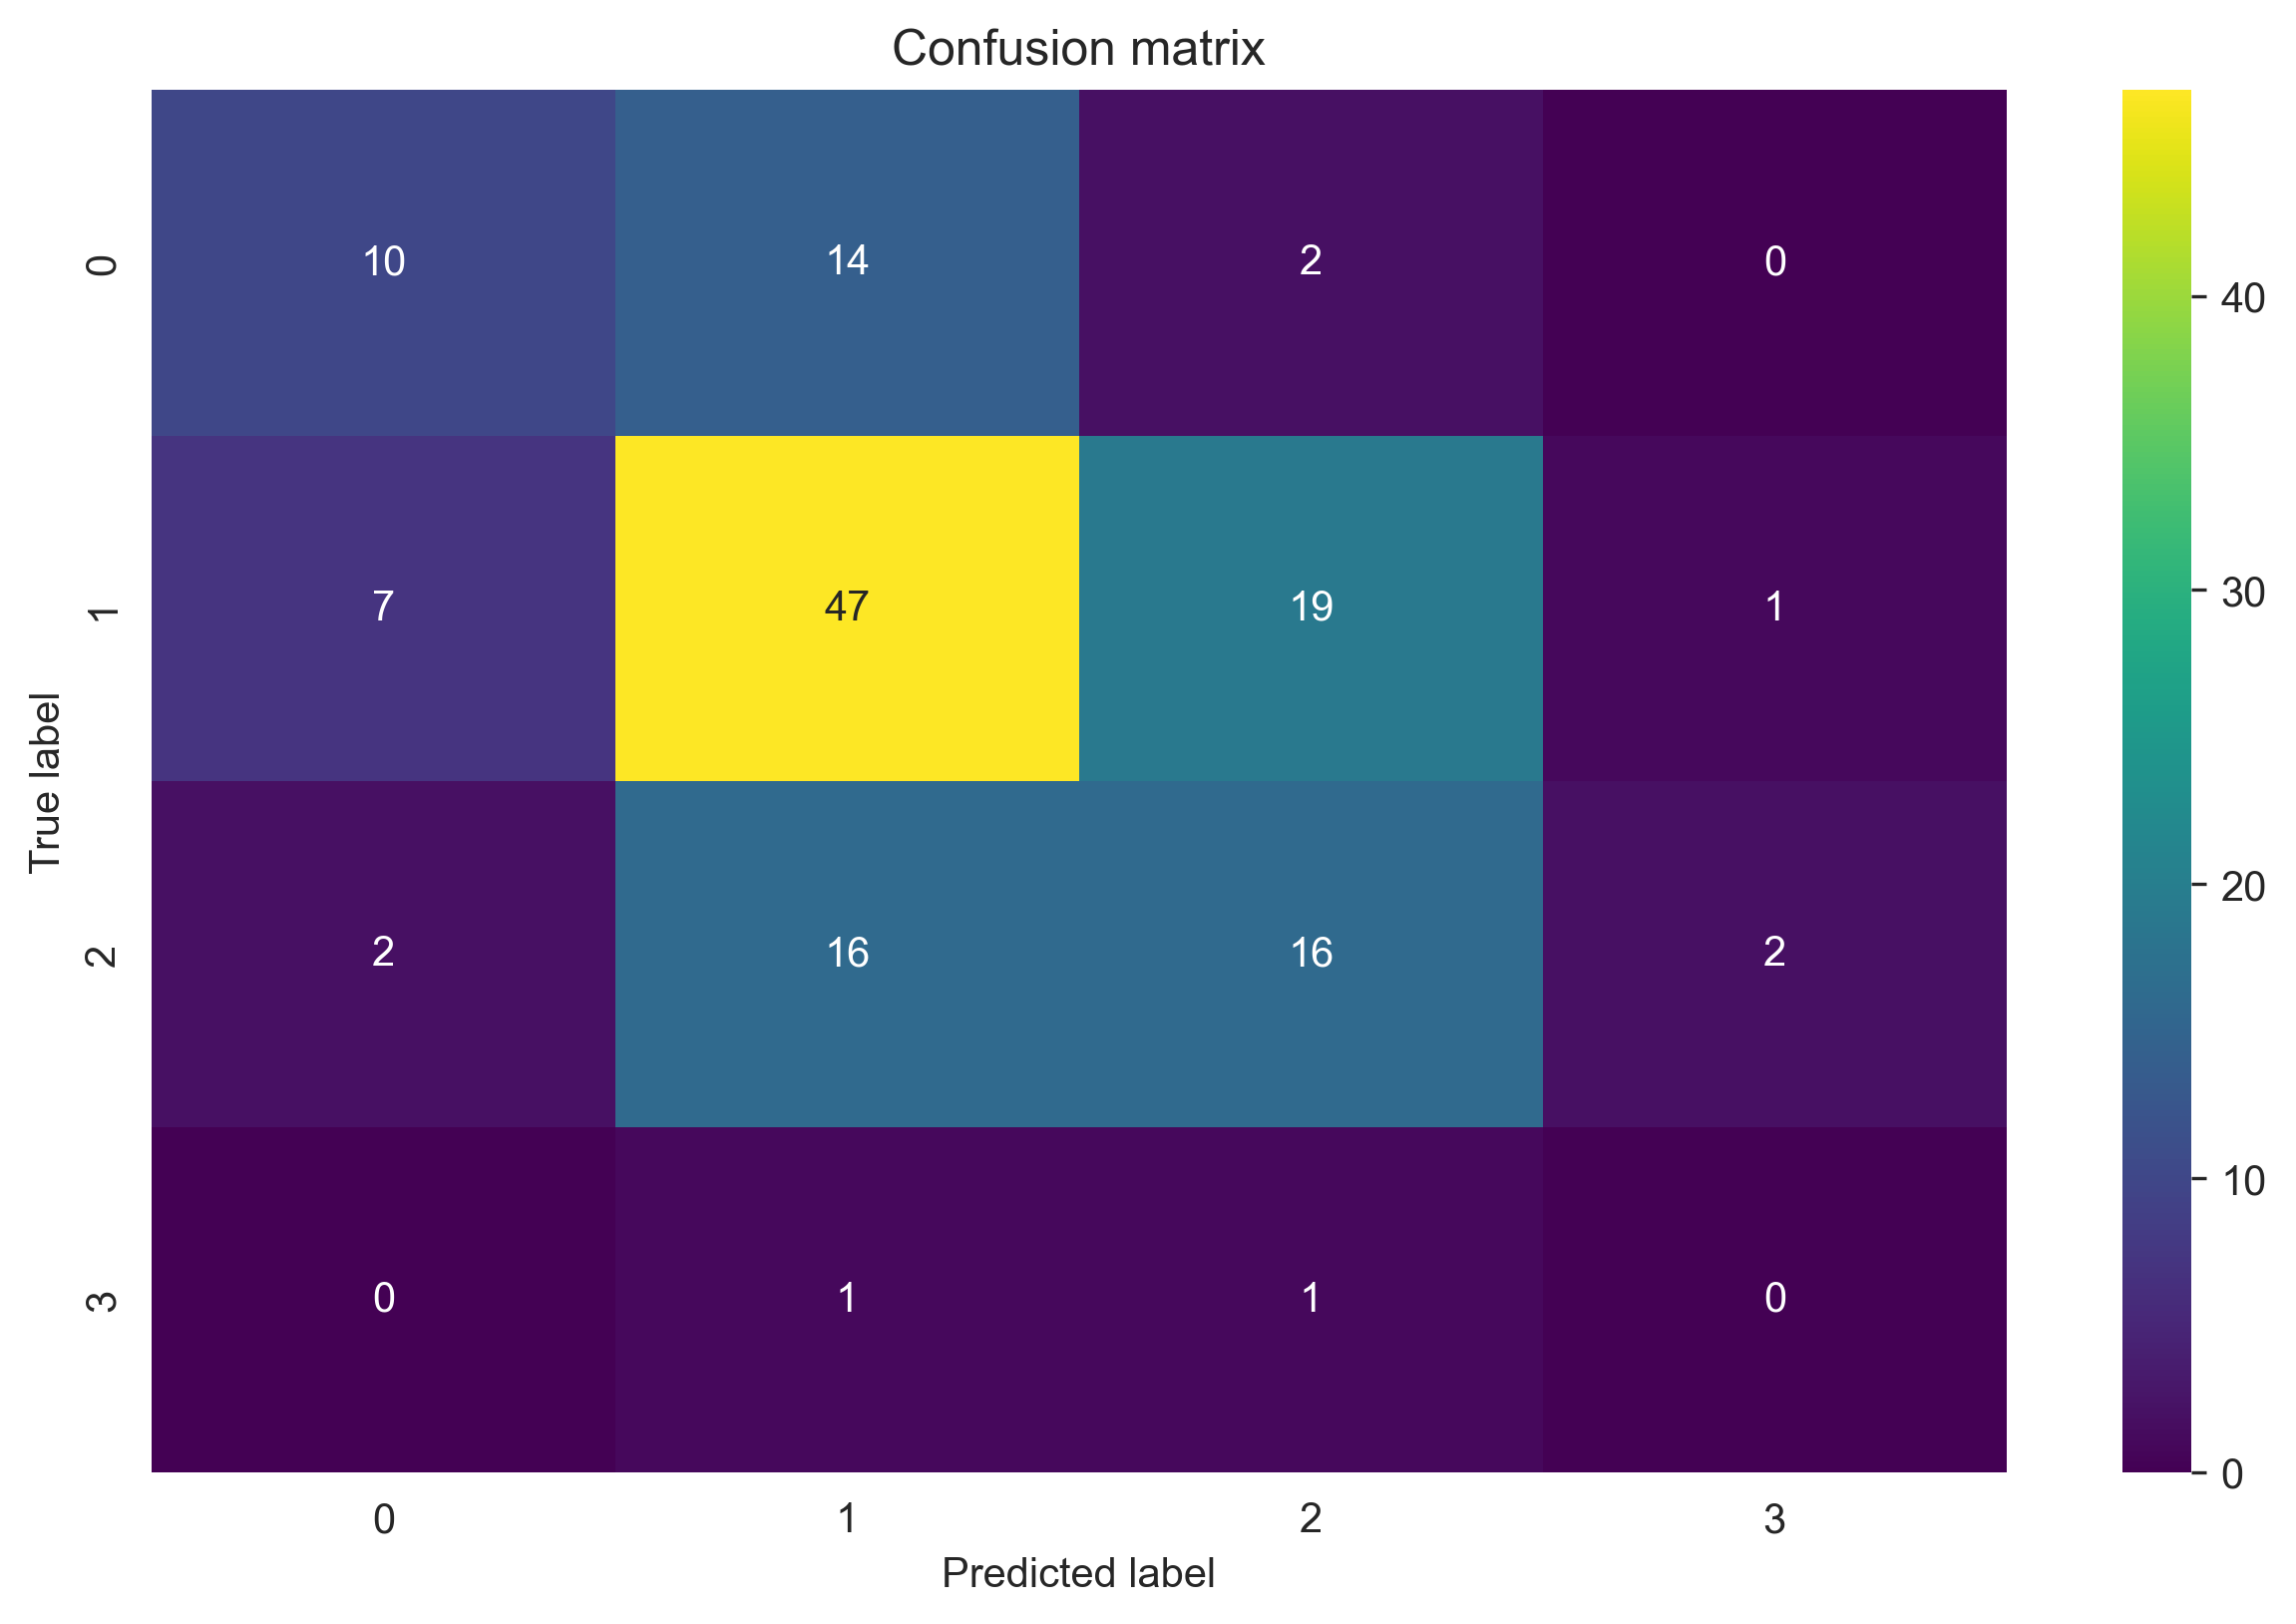

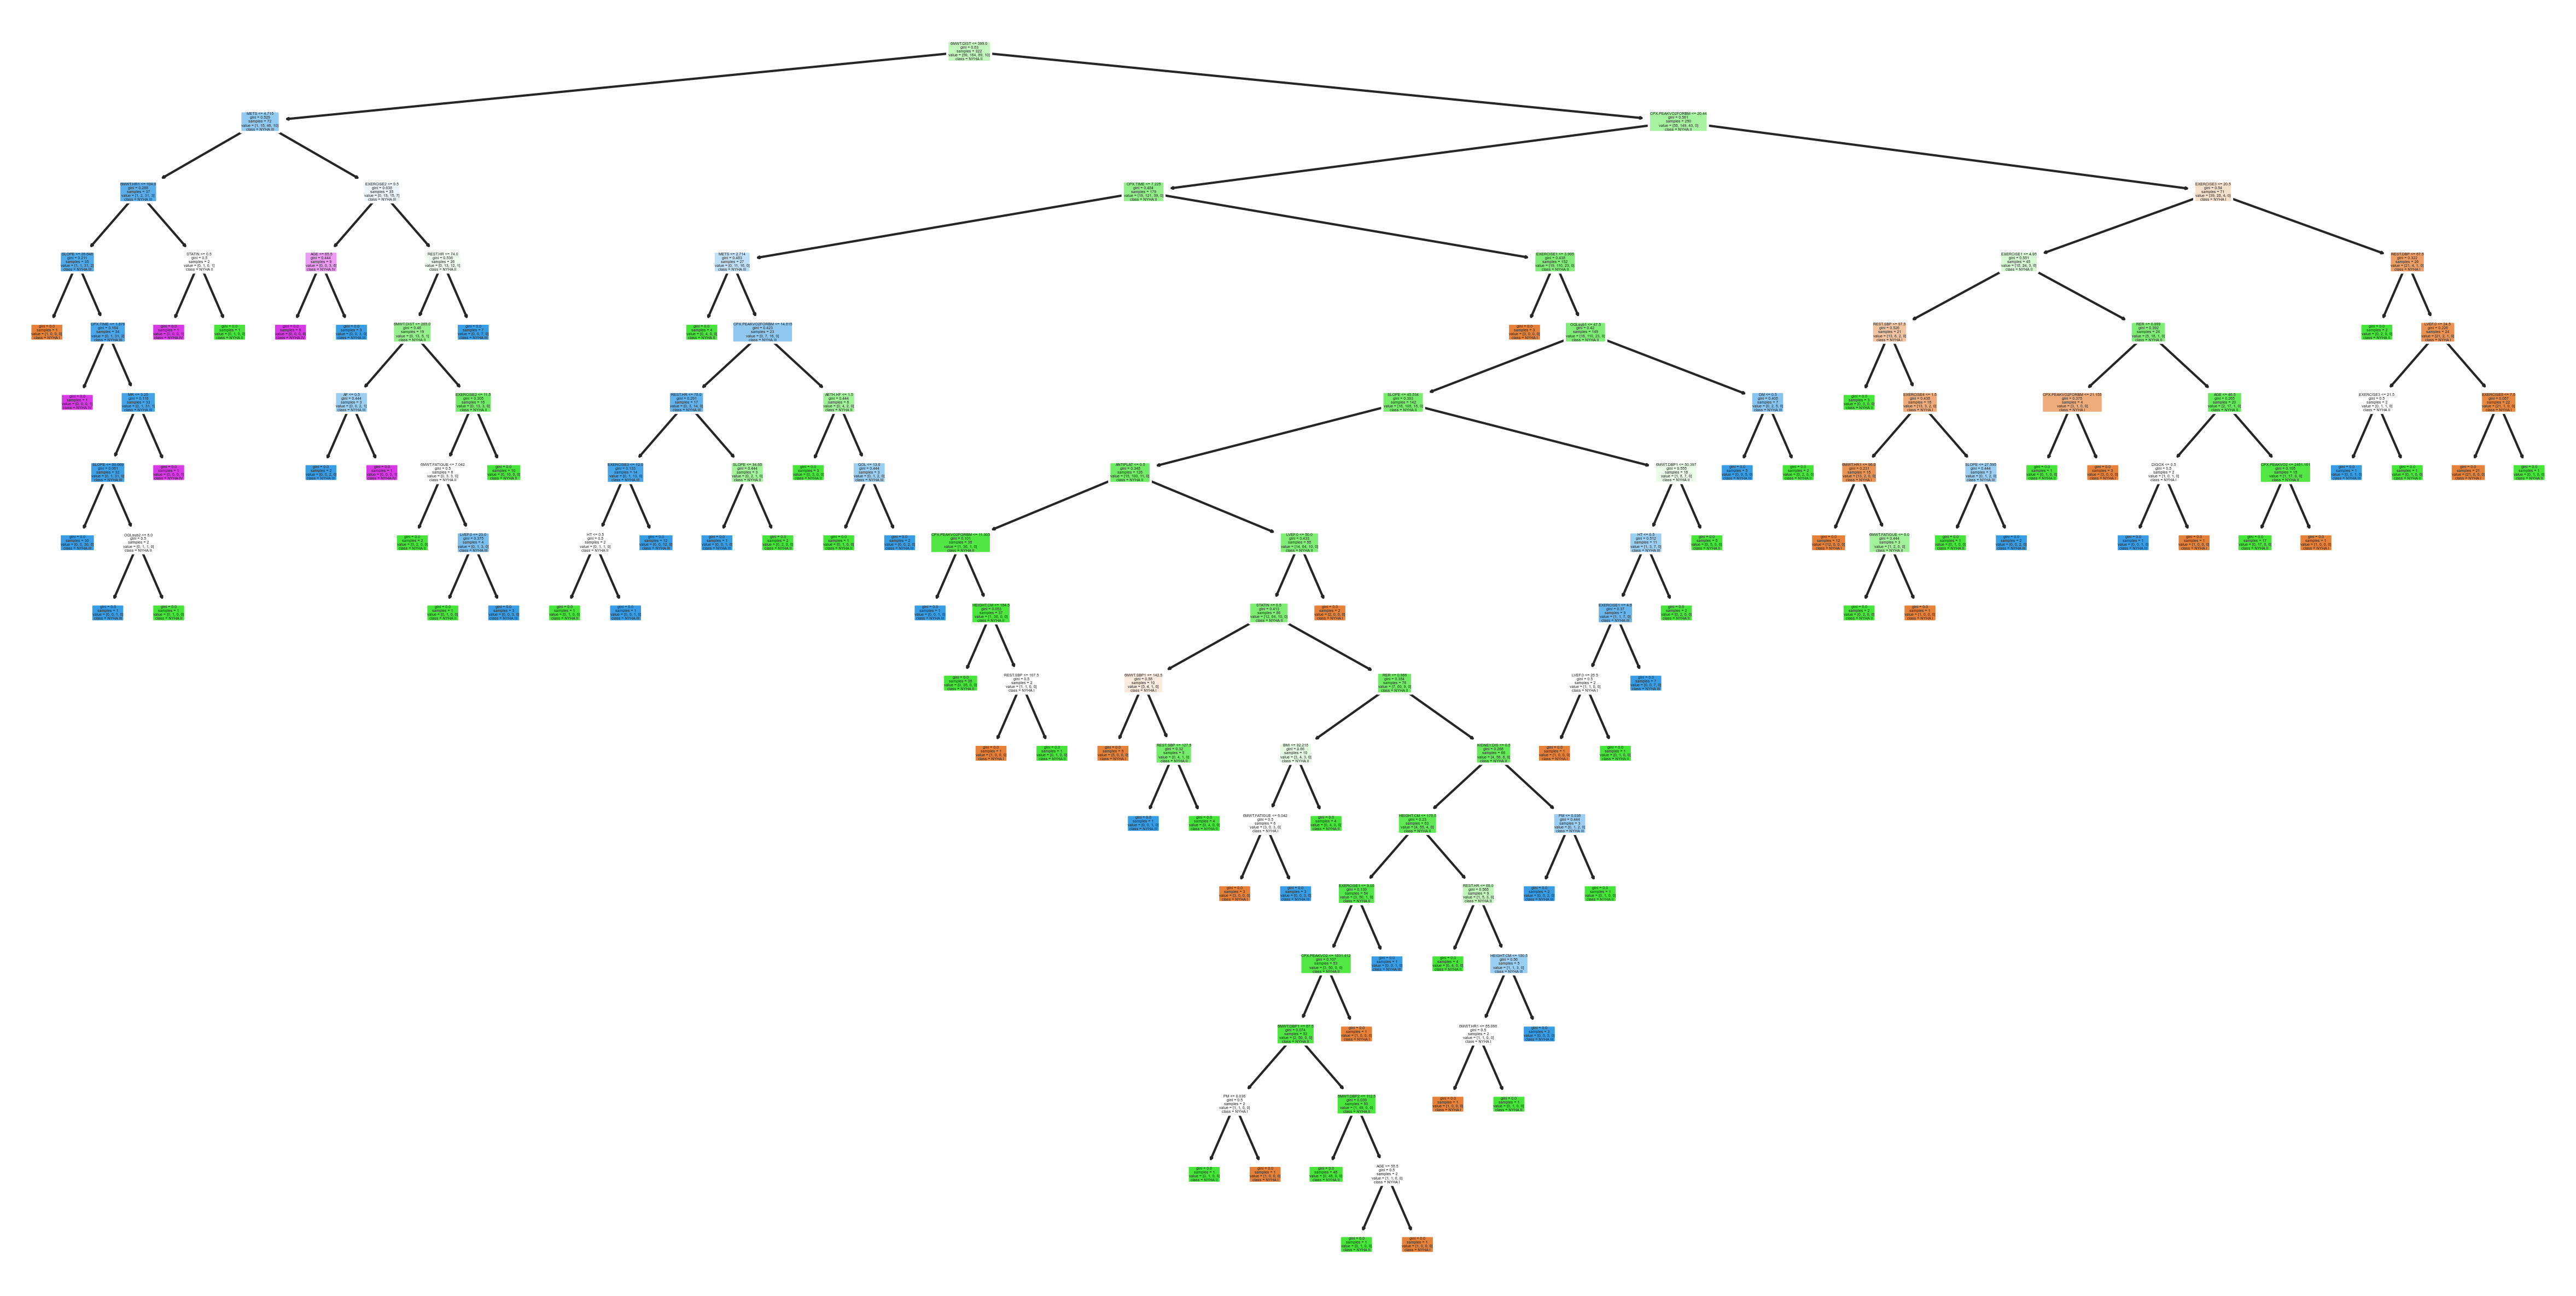

In [33]:
from sklearn.model_selection import train_test_split

# Split data into train and test
X = df.drop('NYHA', axis=1)
y = df['NYHA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
report(model, X_train, X_test, y_train, y_test)

In [19]:

# Set parameters for grid search
# max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
#
# for depth in max_depth:
#     model = DecisionTreeClassifier(max_depth=depth)
#     model.fit(X_train, y_train)
#     report(model, X_train, X_test, y_train, y_test, filename=f"max_depth_{depth}")